Carlos García - 21000475

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Problema 1

In [2]:
def getImage(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [3]:
img = getImage('./imagen3/Gato.jpg')

In [4]:
def setColorChannel(img, color):
    imgOutput = np.zeros_like(img)
    height = img.shape[0]
    width = img.shape[1]

    for i in range(0, height):
        for j in range(0, width):
            pixel = img[i, j]

            if color == 1: #blue
                imgOutput[i, j] = [0, 0, pixel[2]]
            elif color == 2: #green
                imgOutput[i, j] = [0, pixel[1], 0]
            elif color == 3: #red
                imgOutput[i, j] = [pixel[0], 0, 0]
            elif color == 10: #red-green
                imgOutput[i, j] = [pixel[0], pixel[1], 0]
            elif color == 20: #green-blue
                imgOutput[i, j] = [0, pixel[1], pixel[2]]
            elif color == 30: #red-blue
                imgOutput[i, j] = [pixel[0], 0, pixel[2]]
    
    return imgOutput

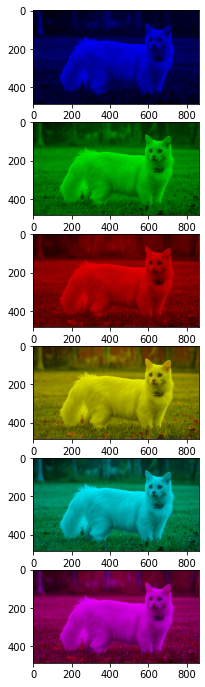

In [5]:
fig, axs = plt.subplots(6, figsize = (12, 12))
options = (1,2,3,10,20,30)
for c in range(0, len(options)):
    imgOut = setColorChannel(img, options[c])
    axs[c].imshow(imgOut)

### Problema 2

In [6]:
def gray_to_rgb(img_R, img_G, img_B):
    imgOutput = np.zeros_like(img_R)
    height = img_R.shape[0]
    width = img_R.shape[1]

    for i in range(0, height):
        for j in range(0, width):
            r = img_R[i, j, 0]
            g = img_G[i, j, 0]
            b = img_B[i, j, 0]

            imgOutput[i, j] = [r, g, b]

    return imgOutput

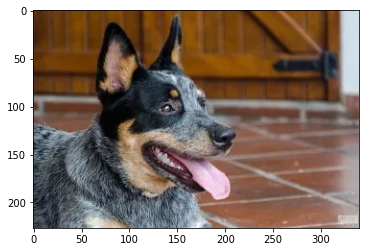

In [7]:
img_R = cv2.imread('./perro/perro_salida_gray_rojo.jpg')
img_G = cv2.imread('./perro/perro_salida_gray_verde.jpg')
img_B = cv2.imread('./perro/perro_salida_gray_azul.jpg')
colorImg = gray_to_rgb(img_R, img_G, img_B)
plt.imshow(colorImg)

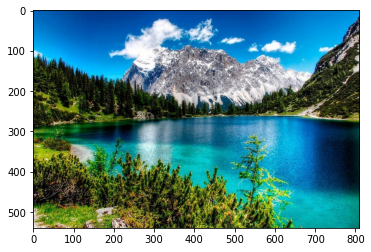

In [8]:
img_R = cv2.imread('./imagen1/imagen1_salida_gray_rojo.jpg')
img_G = cv2.imread('./imagen1/imagen1_salida_gray_verde.jpg')
img_B = cv2.imread('./imagen1/imagen1_salida_gray_azul.jpg')
colorImg = gray_to_rgb(img_R, img_G, img_B)
plt.imshow(colorImg)

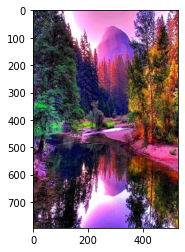

In [9]:
img_R = cv2.imread('./imagen2/imagen2_salida_gray_rojo.jpg')
img_G = cv2.imread('./imagen2/imagen2_salida_gray_verde.jpg')
img_B = cv2.imread('./imagen2/imagen2_salida_gray_azul.jpg')
colorImg = gray_to_rgb(img_R, img_G, img_B)
plt.imshow(colorImg)

### Problema 3

In [10]:
def gray3D(img, outImgStr):
    height = img.shape[0]
    width = img.shape[1]

    gray_R = np.zeros((height, width, 1))
    gray_G = np.zeros((height, width, 1))
    gray_B = np.zeros((height, width, 1))

    for i in range(0, height):
        for j in range(0, width):
            pixel = img[i,j]
            gray_R[i, j] = pixel[0]
            gray_G[i, j] = pixel[1]
            gray_B[i, j] = pixel[2]
    
    cv2.imwrite('./imagen3/' + outImgStr + '_salida_gray_rojo.jpg', gray_R)
    cv2.imwrite('./imagen3/' + outImgStr + '_salida_gray_verde.jpg', gray_G)
    cv2.imwrite('./imagen3/' + outImgStr + '_salida_gray_azul.jpg', gray_B)

    return gray_R, gray_G, gray_B

In [11]:
img = getImage('./imagen3/Gato.jpg')
grayImages = gray3D(img, 'Gato')

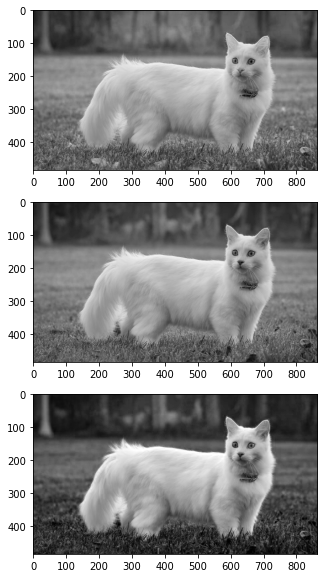

In [12]:
fig, axs = plt.subplots(3, figsize=(10,10))
for i in range(0, len(grayImages)):
    axs[i].imshow(grayImages[i], cmap = 'gray')

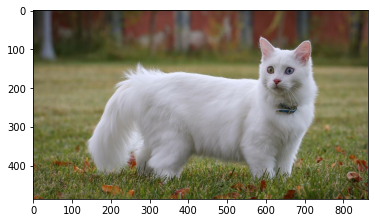

In [13]:
img_R = cv2.imread('./imagen3/Gato_salida_gray_rojo.jpg')
img_G = cv2.imread('./imagen3/Gato_salida_gray_verde.jpg')
img_B = cv2.imread('./imagen3/Gato_salida_gray_azul.jpg')
colorImg = gray_to_rgb(img_R, img_G, img_B)
plt.imshow(colorImg)

### Problema 4

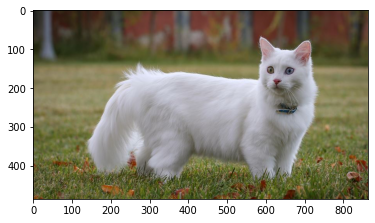

In [14]:
img = getImage('./imagen3/Gato.jpg')
plt.imshow(img)

In [29]:
def colorHist(img):
    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]
    gray_scale = (0.114 * red + 0.587 * green + 0.299 * blue).astype(int)

    colors = ('Red', 'Green', 'Blue', 'Gray')
    imgs = (red, green, blue, gray_scale)
    fig, ax = plt.subplots(4, figsize = (13,13))
    for i in range(0, 4):
        ax[i].set_title('{} Channel Hist'.format(colors[i]))  
        ax[i].axvline(np.mean(imgs[i].flatten()), color = 'black', linestyle = '--')
        sns.histplot(imgs[i].flatten(), kde = False, bins = 60, color = colors[i], ax = ax[i])
        #sns.kdeplot(imgs[i].flatten(), fill = True, color = colors[i], ax = ax[i])

    plt.show()
    return

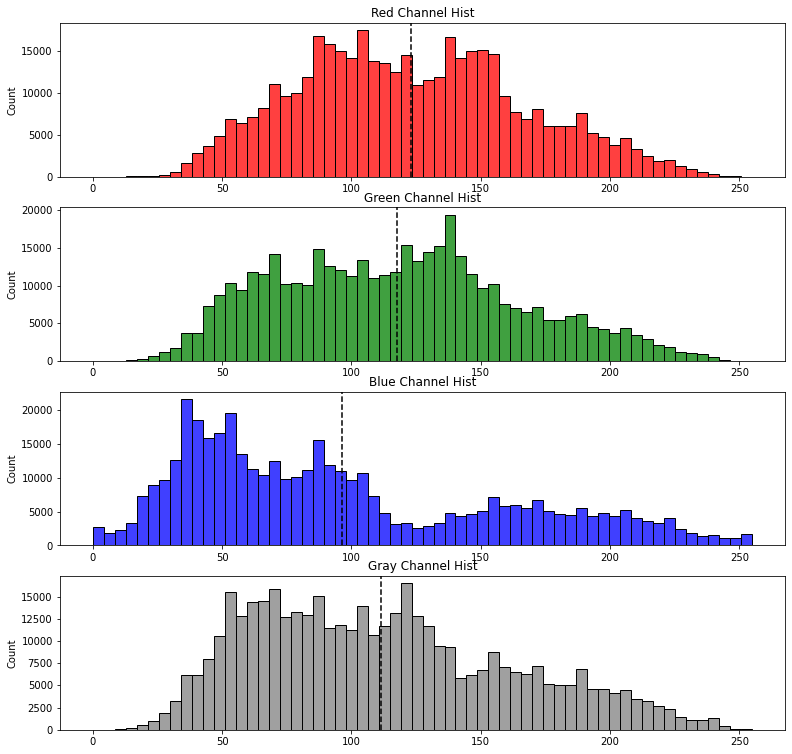

In [30]:
colorHist(img)

### Problema 5

Los modelos de color permiten crear una representación, multidimensional, visual del espectro de colores; usualmente basado en el representaciones 3D a partir de los colores rojo, verde y azul. 

El modelo de color HSV (matiz, saturación, valor) es una representación cilíndrica del espector de colores, que busca una representación más natural para la definición de colores en contraste con el modelo RGB. En este modelo se selecciona el color a partir de sus tres componentes: 
- **Matiz:** Representa el ángulo en un círculo RGB en donde se tiene rojo = 0, verde = 120 y 240 = azul. 
- **Saturación:** Indica la cantidad de color usada
- **Valor:** Controla el brillo del color, es decir la cantidad de negro que se mezcla. 